# Compare ML Algorithms to Human
So far we've been comparing ML algorithms to "true" posteriors of each simulation dataset. Here we are comparing ML algorithms to their human counterparts. Turns out the trend of hellinger distance is in line with individual posterior examination of ML algorithms where the errors seen in the extrapolative regions (i.e. outside of the unit circle r > 1) corroborates the pattern seen from individual posterior. For sprial dataset, the MLP reaches maximum certainty (i.e. reaching either 0 or 1 posterior) as extrapolating further outside, and when hellinger between ML and human is examined the degree of "error" substantially increases for the MLP. Similarly for S-XOR, the MLP shows similar patterns of maximum certainty as moving further out. While the degree of "error" is less than that of the spiral dataset, the MLP shows increasing hellinger distance moving further out where RF is actually showing decreasing hellinger distance indicating increased confidence for RF does not coincide with increasing error. 

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [3]:
print(ib.date)

## Load Dependencies

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1 import AxesGrid

cmap = 'PRGn'

import warnings
warnings.filterwarnings('ignore')

import imageio

In [5]:
#generic global
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]
label = ib.mtype[:3] #excluding QDA
dtype = ib.dtype[2:5:2]
fsize = 18

#figure
SAVEFIG = True

In [6]:
ib.load_sampledData()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ] loaded


## Point-wise averaging and gaussian smoothing estimated posterior
As demonstrated previously, these operations allow for apple to apple comparison between ML and humans, after which the grid coordinates exactly match between ML and human

In [7]:
mtype = []
ib.mask = ib.generate_mask(h=0.1)

for ii in range(2): #S-XOR and spiral
    mtype.append([])
    
    for jj in range(4):
        if jj == 3:
            mtype_i = np.column_stack([ib.human[ii][:,3], ib.human[ii][:,5], ib.human[ii][:,0]]) # human estimates
        else:
            mtype_i = ib.estpst_sample[ii][jj] # ML estimates        
        
        mtype_i = ib.pointwise_gridAverage(mtype_i).to_numpy()        
        xy, original, down, alls = ib.smooth_gaussian_distance(mtype_i, step=0.01, method=None, sigma=1, k=10)
        mtype[ii].append(alls)

## Compute Hellinger Distance between ML and humans
The metric for comparison is a point-wise hellinger distance

In [8]:
hdists = []

for row in range(2):
    hdists.append([])
    for col in range(3):
        hdists[row].append(ib._hellinger_explicit(mtype[row][col], mtype[row][3]))

## Plot Hellinger Distances
Visualization of the hellinger distance between ML and human

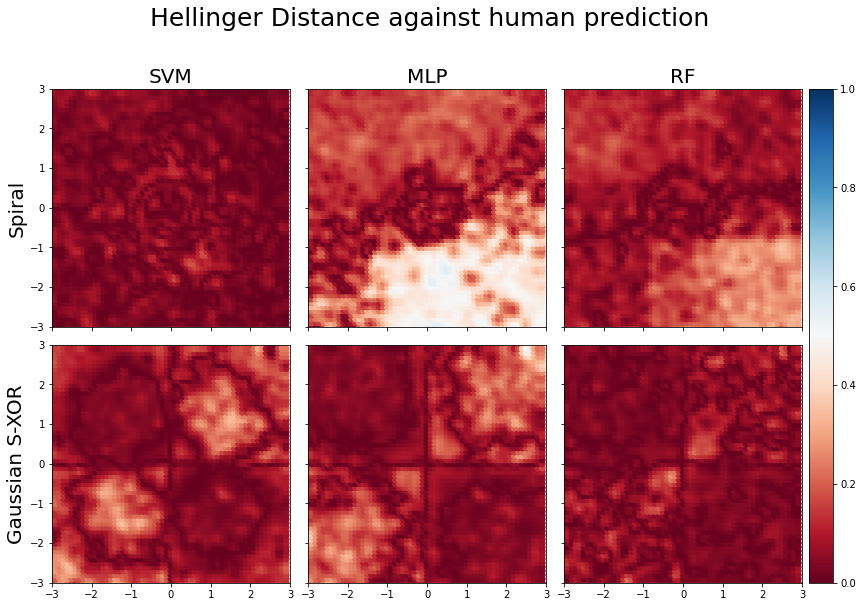

In [9]:
fig = plt.figure(figsize=(7*2, 7*3))

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 3),
                axes_pad=0.25,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

idx = 0

for ax in grid:
    row = idx // 3
    col = idx % 3
    # ax.set_axis_off()        
    mlp = ax.scatter(ib.mask[:,0], ib.mask[:,1], c=hdists[row][col], cmap='RdBu', vmin=0, vmax=1)

    if row == 0:
        ax.set_title(ib.mtype[col], fontsize=20)

    if col == 0:
        ax.set_ylabel(dtype[row], fontsize=20)

    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    ax.set_yticks(np.arange(-3,4))
    ax.set_xticks(np.arange(-3,4))
    
    idx += 1    

cbar = ax.cax.colorbar(mlp)
cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))

fig.suptitle("Hellinger Distance against human prediction", y=0.72, fontsize=25)

if SAVEFIG:  
    plt.savefig(f'figs/[20210808_compare_ML2human]_hellinger_vis_{str(ib.date.date())}.jpg', bbox_inches='tight')

plt.show()

## Generate compiled plot and output images

  0%|          | 0/16 [00:00<?, ?it/s]

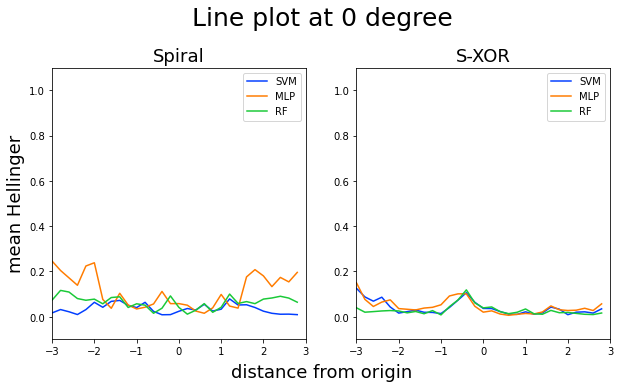

  6%|▋         | 1/16 [00:04<01:01,  4.12s/it]

<Figure size 432x288 with 0 Axes>

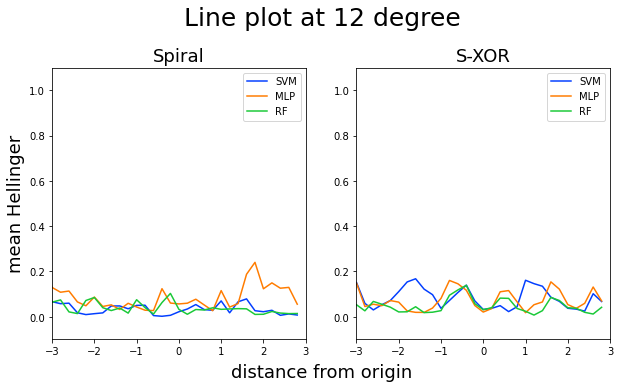

 12%|█▎        | 2/16 [00:07<00:54,  3.92s/it]

<Figure size 432x288 with 0 Axes>

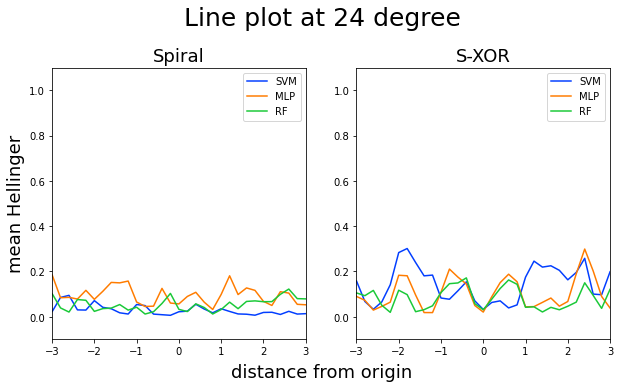

 19%|█▉        | 3/16 [00:11<00:49,  3.83s/it]

<Figure size 432x288 with 0 Axes>

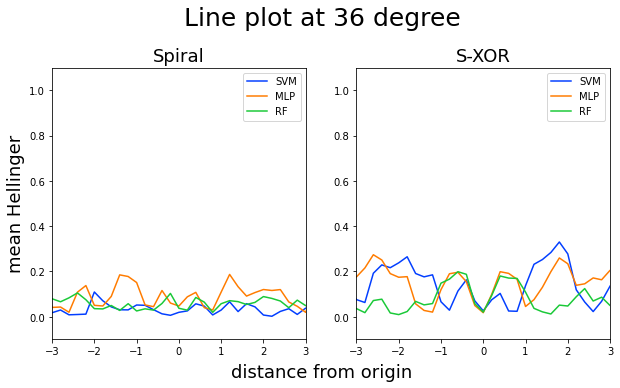

 25%|██▌       | 4/16 [00:14<00:43,  3.64s/it]

<Figure size 432x288 with 0 Axes>

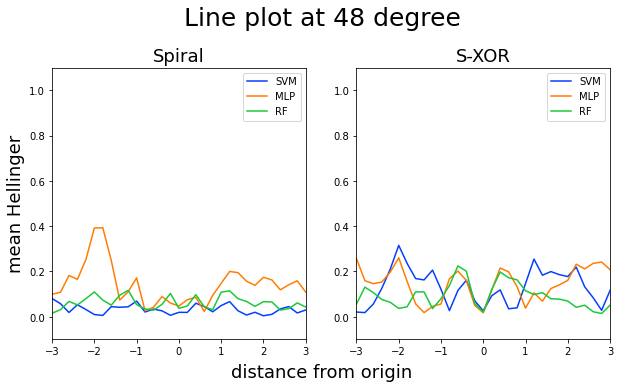

 31%|███▏      | 5/16 [00:16<00:35,  3.26s/it]

<Figure size 432x288 with 0 Axes>

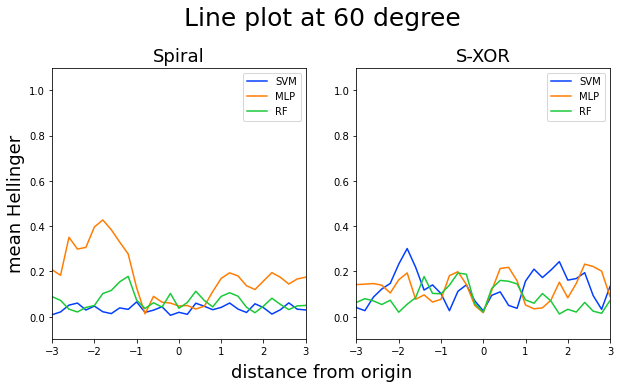

 38%|███▊      | 6/16 [00:19<00:29,  2.96s/it]

<Figure size 432x288 with 0 Axes>

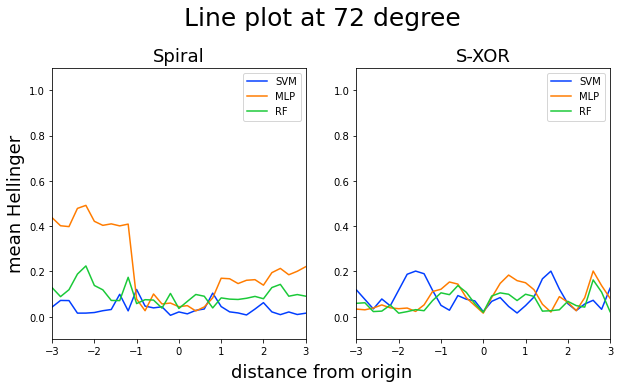

 44%|████▍     | 7/16 [00:21<00:24,  2.75s/it]

<Figure size 432x288 with 0 Axes>

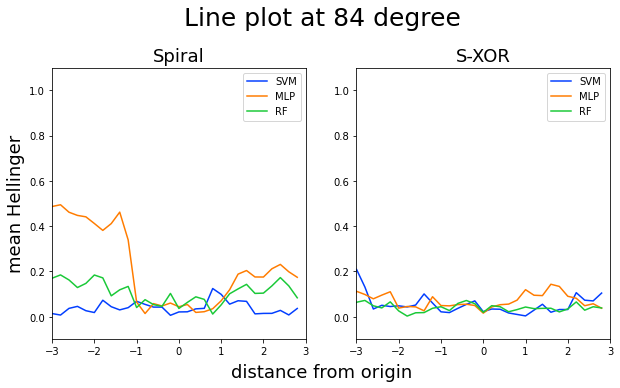

 50%|█████     | 8/16 [00:23<00:20,  2.60s/it]

<Figure size 432x288 with 0 Axes>

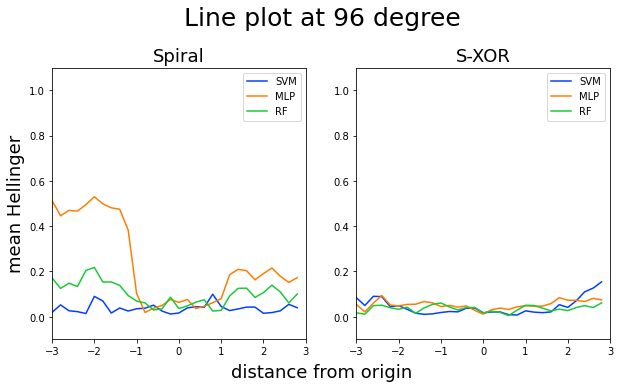

 56%|█████▋    | 9/16 [00:26<00:17,  2.57s/it]

<Figure size 432x288 with 0 Axes>

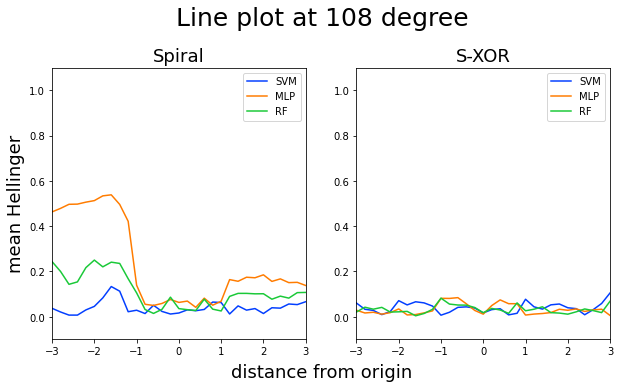

 62%|██████▎   | 10/16 [00:28<00:15,  2.52s/it]

<Figure size 432x288 with 0 Axes>

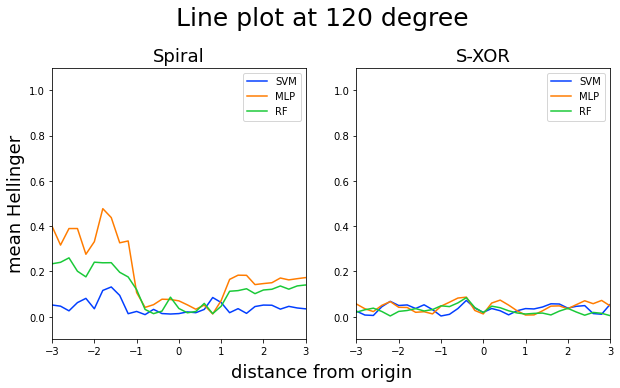

 69%|██████▉   | 11/16 [00:30<00:12,  2.51s/it]

<Figure size 432x288 with 0 Axes>

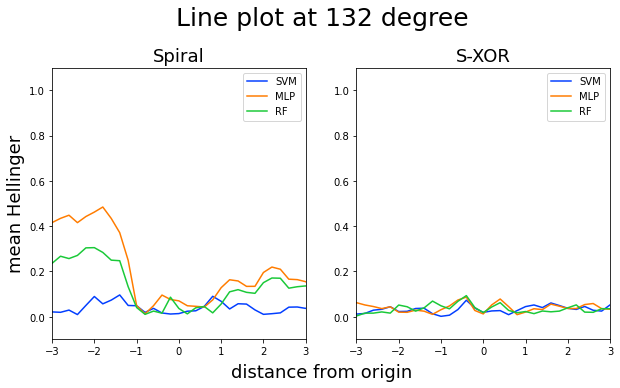

 75%|███████▌  | 12/16 [00:33<00:10,  2.62s/it]

<Figure size 432x288 with 0 Axes>

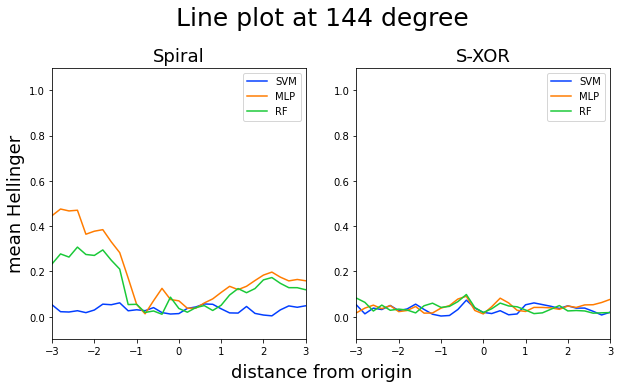

 81%|████████▏ | 13/16 [00:37<00:08,  2.87s/it]

<Figure size 432x288 with 0 Axes>

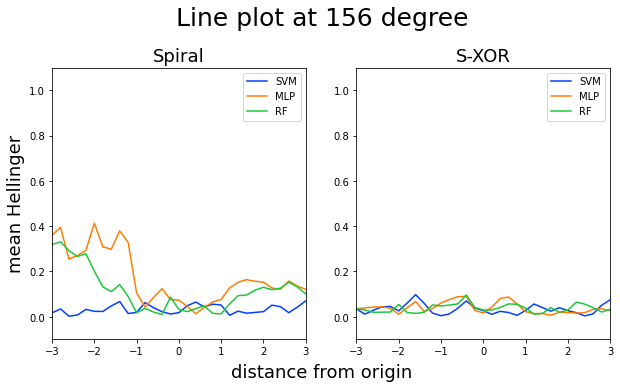

 88%|████████▊ | 14/16 [00:40<00:06,  3.01s/it]

<Figure size 432x288 with 0 Axes>

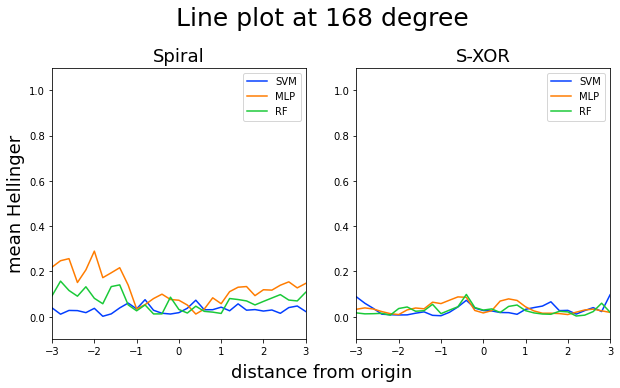

 94%|█████████▍| 15/16 [00:43<00:02,  2.89s/it]

<Figure size 432x288 with 0 Axes>

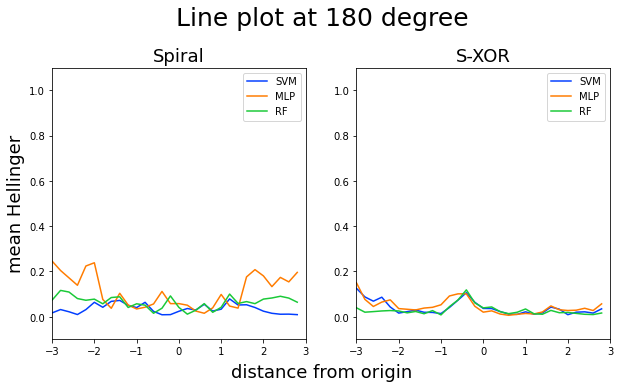

100%|██████████| 16/16 [00:45<00:00,  2.87s/it]


<Figure size 432x288 with 0 Axes>

In [10]:
angle_step = 12 #default = 12
new_dtype = ['Original'] + dtype
fdtype = ['spiral', 'sxor'] #dtype defined for filename

palette = sns.color_palette('bright', len(ib.mtype))

col = 1
row = 1

step = 0.2
r = 4
x_range = np.arange(-r,r,step)

for deg in tqdm(np.arange(0, 180+angle_step, angle_step)):

    fig, axbig = plt.subplots(1,2,figsize=(5*2,5), sharex=True)

    line_plot = []
    line_post = []

    #selecting linear region of interest over hellinger distance at given degree of angle

    for i in tqdm(range(2), leave=False):    
        line_plot.append([])
        line_post.append([])

        for j in range(3):
            line_plot[i].append([])
            line_post[i].append(ib.select_linear_region(hdists[i][j], degree=deg, step=0.001))
            
            lp, li = line_post[i][j] #line posterior, line index
            x = ib.mask[li][:,0]
            y = ib.mask[li][:,1]
            dist = np.sqrt(x**2 + y**2)

            dist[y < 0] *= -1 # negative radial distance wrt y-coordinate

            for rad in x_range:              
                line_plot[i][j].append(np.array(lp[(dist >= rad) * (dist < rad+step)]).mean())

    #plotting line plots

    for sw in range(2):

        tempdf = pd.DataFrame(np.array(line_plot[sw]).T, columns=label) #switch here
        tempdf.index = x_range
        for i, lab in enumerate(label):
            sns.lineplot(data=tempdf[[lab]], ax=axbig[sw], palette=[palette[i]])

        axbig[sw].set_title(['Spiral', 'S-XOR'][sw], fontsize=18)
        axbig[0].set_ylabel('mean Hellinger', fontsize=18)
        axbig[sw].set_ylim([-0.1,1.1])
        axbig[sw].set_xlim(-3,3)

    fig.suptitle(f'Line plot at {deg} degree', y=1.05, fontsize=25)
    fig.supxlabel('distance from origin', fontsize=18)

    if SAVEFIG:  
        plt.savefig(f'figs/[20210808_compare_ML2human]_fullplot_{deg}deg_{str(ib.date.date())}.jpg', bbox_inches='tight')

    plt.show()
    plt.clf();    

## Construct gif using image files

In [11]:
imgpath = 'figs'
imglist = os.listdir(imgpath)

In [12]:
filtered = [i for i in imglist if '[20210808_compare_ML2human]_fullplot' in i]
filtered = [i for i in filtered if 'jpg' in i]

In [13]:
filtered

['[20210808_compare_ML2human]_fullplot_0deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_108deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_120deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_12deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_132deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_144deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_156deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_168deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_180deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_24deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_36deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_48deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_60deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_72deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_84deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_96deg_2021-08-10.jpg']

In [14]:
temp = []

for filename in filtered:
    s = filename.rfind('plot_')
    e = filename.rfind('deg_')

    temp.append(filename[s+5:e])

In [15]:
idx = np.argsort(np.array(temp).astype(int))
filtered = np.array(filtered)[idx].tolist()

In [16]:
filtered

['[20210808_compare_ML2human]_fullplot_0deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_12deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_24deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_36deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_48deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_60deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_72deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_84deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_96deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_108deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_120deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_132deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_144deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_156deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_168deg_2021-08-10.jpg',
 '[20210808_compare_ML2human]_fullplot_180deg_2021-08-10.jpg']

In [18]:
if SAVEFIG:
    images = []

    for filename in filtered:
        images.append(imageio.imread(imgpath + '/' + filename))
    imgname = f'figs/[20210808_compare_ML2human]_fullplot_animated_{str(ib.date.date())}.gif'
    imageio.mimsave(imgname, images, fps=2)